In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.grid'] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv


In [2]:
df = pd.read_csv('/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [4]:
del df['Unnamed: 0']

In [5]:
df.rename(columns={'group': 'Group'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [6]:
# Фильтрация строк, где есть NaN в колонках Initial_EDSS и Final_EDSS
df_with_NA = df[df['Initial_EDSS'].isna() & df['Final_EDSS'].isna()]

print(df_with_NA)

     Gender  Age  Schooling  Breastfeeding  Varicella  Initial_Symptom  \
125       2   36        9.0              1          1              1.0   
126       1   35        9.0              2          3             10.0   
127       2   36       15.0              2          1              1.0   
128       2   59       12.0              1          1              8.0   
129       1   25       12.0              2          2              3.0   
..      ...  ...        ...            ...        ...              ...   
268       2   31        8.0              3          1              9.0   
269       1   21       15.0              3          3              5.0   
270       2   19       12.0              3          3             13.0   
271       2   32       15.0              3          3             15.0   
272       2   77        6.0              3          3              2.0   

     Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  ULSSEP  VEP  BAEP  \
125                        1     

In [7]:
# Группировка и подсчет количества NA по переменным Initial_EDSS и Group
Initial_EDSS_by_Group = df.groupby(['Initial_EDSS', 'Group']).size().unstack()

# Группировка и подсчет количества NA по переменным Final_EDSS и Group
Final_EDSS_by_Group = df.groupby(['Final_EDSS', 'Group']).size().unstack()

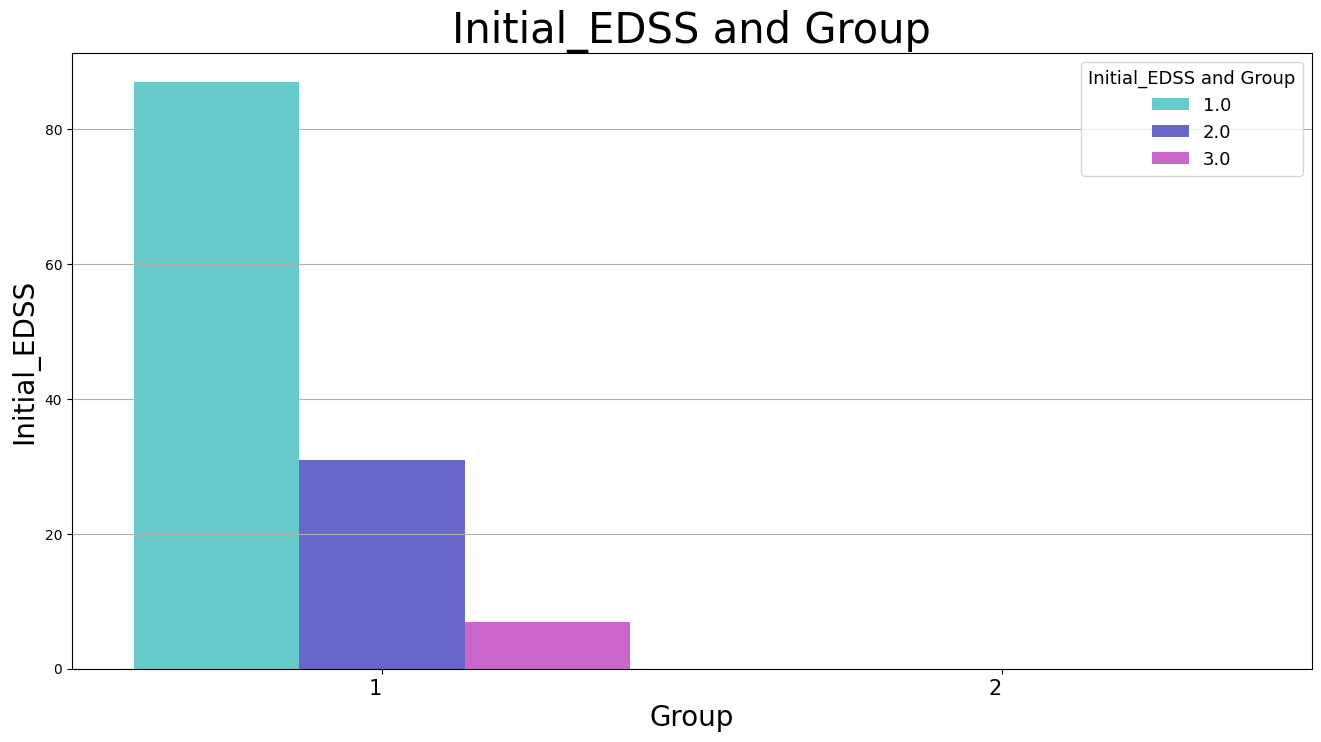

In [8]:
plt.figure(figsize=(16, 8))
colors = sns.hls_palette(h=.5)

sns.countplot(data=df, 
              x='Group', 
              hue='Initial_EDSS',
              palette=colors)

plt.title('Initial_EDSS and Group', fontsize=30)
plt.ylabel('Initial_EDSS', fontsize=20)
plt.xlabel('Group', fontsize=20)

bins=15
plt.xticks(ha='right', fontsize=15)
plt.legend(title='Initial_EDSS and Group', title_fontsize=13, fontsize=13)

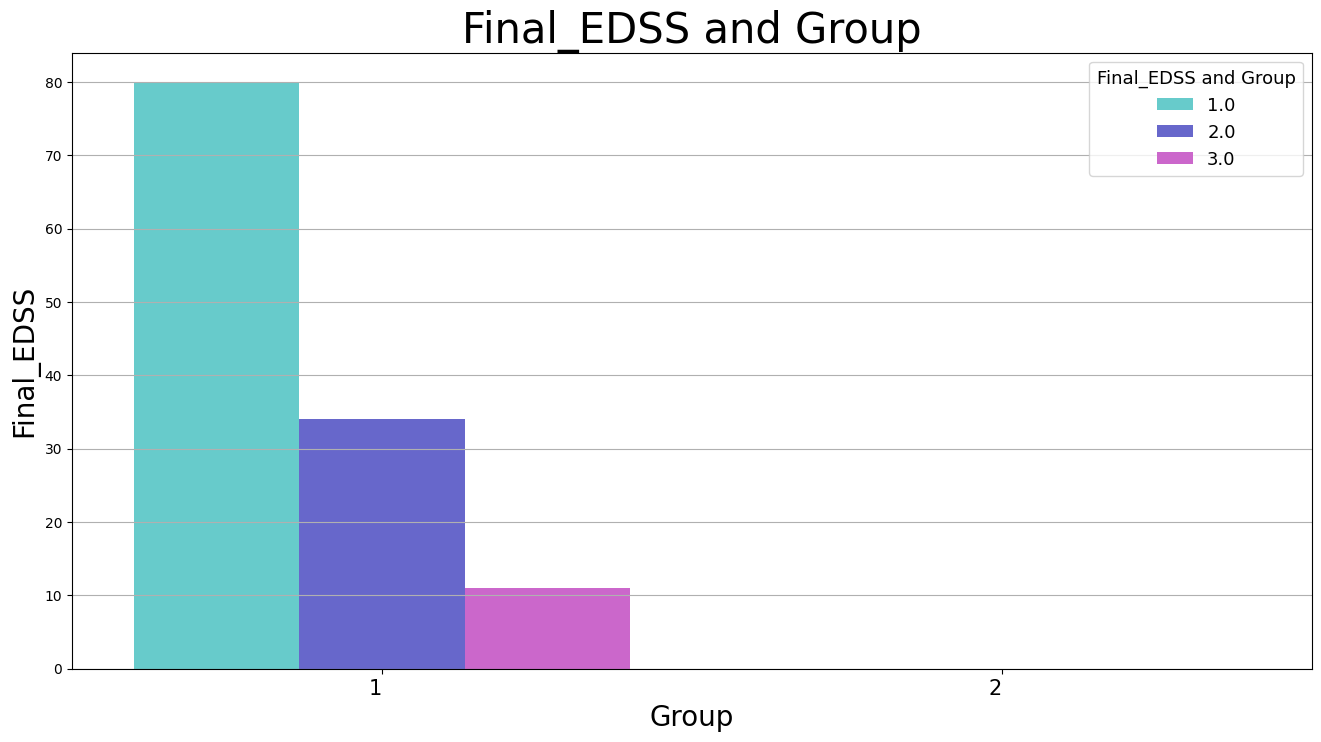

In [9]:
plt.figure(figsize=(16, 8))
colors = sns.hls_palette(h=.5)

sns.countplot(data=df, 
              x='Group', 
              hue='Final_EDSS',
              palette=colors)

plt.title('Final_EDSS and Group', fontsize=30)
plt.ylabel('Final_EDSS', fontsize=20)
plt.xlabel('Group', fontsize=20)

bins=15
plt.xticks(ha='right', fontsize=15)
plt.legend(title='Final_EDSS and Group', title_fontsize=13, fontsize=13)

In [10]:
df[['Initial_EDSS', 'Final_EDSS']] = df[['Initial_EDSS', 'Final_EDSS']].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [12]:
# Функция для заполнения пропущенных значений методами машинного обучения
def fill_missing_values(df, column):
    # Разделение данных на обучающие и тестовые, где есть и нет пропущенных значений
    df_notna = df[df[column].notna()]
    df_na = df[df[column].isna()]

    # Разделение данных на признаки и целевую переменную
    X = df_notna.drop(columns=[column])
    y = df_notna[column]
    X_test = df_na.drop(columns=[column])

    # Предварительная обработка данных: заполнение пропущенных значений в признаках
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    X_test = imputer.transform(X_test)

    # Обучение модели
    model = RandomForestRegressor()
    model.fit(X, y)

    # Предсказание пропущенных значений
    predicted_values = model.predict(X_test)

    # Заполнение пропущенных значений
    df.loc[df[column].isna(), column] = predicted_values

    return df

# Заполнение пропущенных значений в колонках 'Schooling' и 'Initial_Symptom'
columns_to_fill = ['Schooling', 'Initial_Symptom']

for column in columns_to_fill:
    df = fill_missing_values(df, column)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                273 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          273 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Определение признаков и целевой переменной
X = df.drop('Group', axis=1)  # Признаки
y = df['Group']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Важность факторов
importances = model.feature_importances_

# Создание DataFrame для важности факторов
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Сортировка факторов по важности
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                    Feature  Importance
17               Final_EDSS    0.468157
16             Initial_EDSS    0.348912
12      Periventricular_MRI    0.059886
5           Initial_Symptom    0.035058
14       Infratentorial_MRI    0.028724
4                 Varicella    0.009821
2                 Schooling    0.008326
7         Oligoclonal_Bands    0.008177
1                       Age    0.006699
0                    Gender    0.006243
13             Cortical_MRI    0.005261
3             Breastfeeding    0.003467
8                    LLSSEP    0.003290
10                      VEP    0.002797
9                    ULSSEP    0.002316
6   Mono_or_Polysymptomatic    0.002040
15          Spinal_Cord_MRI    0.000468
11                     BAEP    0.000360


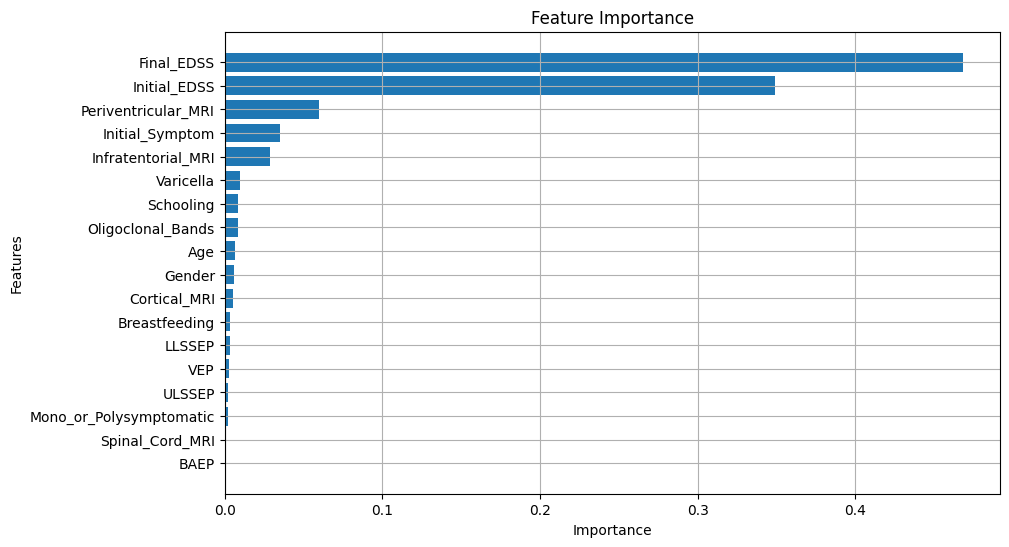

In [15]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))

plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()